In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Can you accurately predict insurance costs?

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 1. Display Top 5 Rows of The Dataset

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Check Last 5 Rows of The Dataset

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
print("the no of rows are",df.shape[0])
print('The no of columns are',df.shape[1])

the no of rows are 1338
The no of columns are 7


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 5. Check Null Values In The Dataset

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 6. Get Overall Statistics About The Dataset

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 7. Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [10]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# sex

In [11]:
df.sex.unique()


array(['female', 'male'], dtype=object)

In [12]:
df["sex"]=df["sex"].map({'female':0, 'male':1})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


# smoker

In [15]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [16]:
df["smoker"]=df["smoker"].map({'yes':1, 'no':0})

In [17]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


# region

In [18]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
df["region"]=df["region"].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [20]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


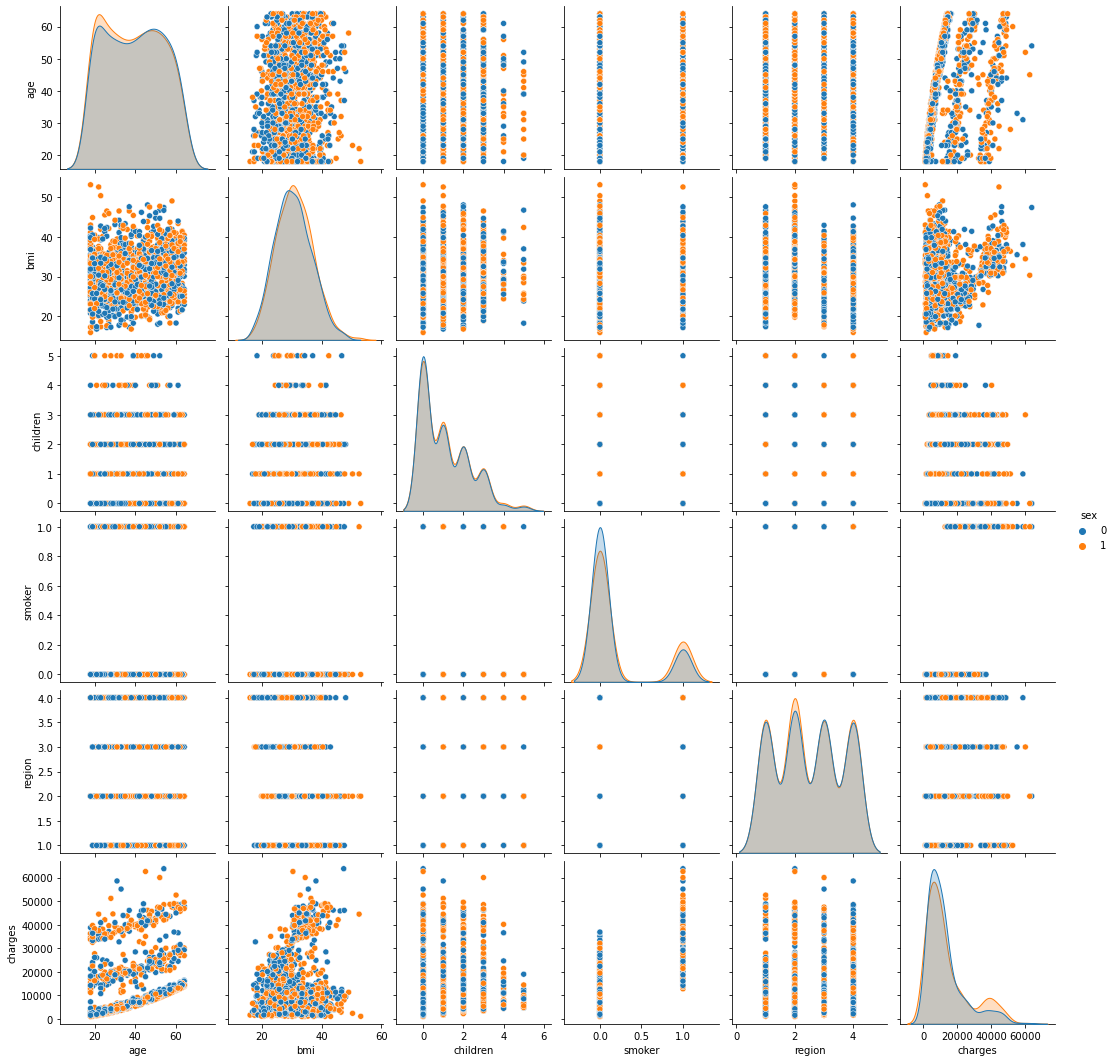

In [69]:
sns.pairplot(df,hue="sex")

# 8. Store Feature Matrix In X and Response(Target) In Vector y

In [27]:
x=df.iloc[:,:6].values

In [28]:
y=df.iloc[:,6]

In [29]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# 9. Train/Test split

# a. Split data into two-part: a training set and a testing set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
X_train

array([[43.   ,  0.   , 25.08 ,  0.   ,  0.   ,  4.   ],
       [39.   ,  1.   , 35.3  ,  2.   ,  1.   ,  1.   ],
       [45.   ,  0.   , 30.495,  1.   ,  1.   ,  3.   ],
       ...,
       [58.   ,  1.   , 25.175,  0.   ,  0.   ,  4.   ],
       [37.   ,  0.   , 47.6  ,  2.   ,  1.   ,  1.   ],
       [55.   ,  1.   , 29.9  ,  0.   ,  0.   ,  1.   ]])

In [33]:
X_test

array([[45.   ,  0.   , 25.175,  2.   ,  0.   ,  4.   ],
       [36.   ,  0.   , 30.02 ,  0.   ,  0.   ,  3.   ],
       [64.   ,  0.   , 26.885,  0.   ,  1.   ,  3.   ],
       ...,
       [53.   ,  1.   , 21.4  ,  1.   ,  0.   ,  1.   ],
       [26.   ,  0.   , 29.64 ,  4.   ,  0.   ,  4.   ],
       [23.   ,  1.   , 32.56 ,  0.   ,  0.   ,  2.   ]])

In [34]:
y_train

1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 896, dtype: float64

# b. Train the model(s) on the training set

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)
##svr
svm=SVR()
svm.fit(X_train,y_train)
##random reegression
rg=RandomForestRegressor()
rg.fit(X_train,y_train)
##Gradient regressor
Gr=GradientBoostingRegressor()
Gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Test the models

In [40]:
y1=lr.predict(X_test)
y2=svm.predict(X_test)
y3=rg.predict(X_test)
y4=Gr.predict(X_test)

In [42]:
df1=pd.DataFrame({"Actual":y_test,"Linear":y1,"SVR":y2,"RR":y3,"GR":y4})

In [43]:
df1

,Actual,Linear,SVR,RR,GR
764,9095.06825,8784.663103,9530.386173,9950.254524,10090.498242
887,5272.17580,7043.981950,9482.820180,5316.737483,5886.662611
890,29330.98315,37000.451569,9616.111722,28494.733474,29178.301014
1293,9301.89355,9449.574160,9536.152784,9000.064755,9106.451883
259,33750.29180,27062.629305,9421.352581,34548.836062,34337.431600
...,...,...,...,...,...
644,18806.14547,11269.626982,9523.616076,9359.498838,16034.266101
602,11070.53500,10079.598118,9586.289162,13329.005554,12485.597899
731,10065.41300,8461.056486,9569.335902,12657.698808,11346.889231
321,24671.66334,6081.197595,9439.155552,7715.366292,7430.157697


# 10. Compare Performance Visually  or we say check accuracy of model

In [46]:
s1=lr.score(X_train,y_train)
s2=svm.score(X_train,y_train)
s3=rg.score(X_train,y_train)
s4=Gr.score(X_train,y_train)

In [47]:
print(s1,s2,s3,s4)

0.7454841022663418 -0.09922101700369024 0.9770328967342886 0.9090438888722534


In [59]:
print("The accuracy of Random Regressor is to high so we decided to take Random Regressor model for prediction",(s3*100).round(3),"%")

The accuracy of Random Regressor is to high so we decided to take Random Regressor model for prediction 97.703 %
